# Udacity: Intro to Data Analysis Project

#### Purpose

The purpose of this notebook is to explore the data of the survivors of the titantic. And, to gleam any factors that may have contributed to a suvivor survival. 

The raw data set can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv).

The description of the data set can be found [here](https://www.kaggle.com/c/titanic/data).

### Imports

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

### Processing the Data

In [2]:
data_file = 'C:\\Users\\dsharp\\Documents\\Udacity\\Intro to Data Analysis\\titanic-data.csv'

titanic_raw_df = pd.read_csv(data_file, header=0)

In [3]:
titanic_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_raw_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Analysis of the Data Quality

After loading the csv into python and small visual check of the data. I want to examine the data types of the columns and the number of vaules for each row.

In [6]:
row, col = titanic_raw_df.shape
print("The shape of the overall dataframe is {0} by {1}".format(row, col))
print()
print(titanic_raw_df.info())

The shape of the overall dataframe is 891 by 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


There are a total of __891__ rows; however, __age, cabin, and emarked __ seem to have values missing. Emarked is missing 2, age is missing 150 entries, and cabin is missing 687. Cabin is quite interesting because one might think they would have the complete records of who should be assigned to each cabin. But, that might not be the case.

Regarding the data types of each column. No column seems unusual. Values that are considered 'numerical' like age and fare are ints and floats respectively. And, string type values are objects. So, I will proceed and look at the numerical columns' summary statistics ie mean, medium, etc.

In [7]:
titanic_raw_df[['Age', 'SibSp','Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Age seems fairly responsible. The IQR is from 20 to 38, so about 50% were adults.

The sibling and parent-child data seems a little suprising. I had expected more people to travel with family. Since the number of relationships can be grouped by whole numbers. I will look at the counts to a more granural analysis. 

The fare's mean is about 32 pounds, or 3400 pounds today(4452 dollars). The fare's max seems a little strange. The max value is 512 pounds, the value seems a little high. If you adjust for inflation that would be about 55k pounds or $72k.

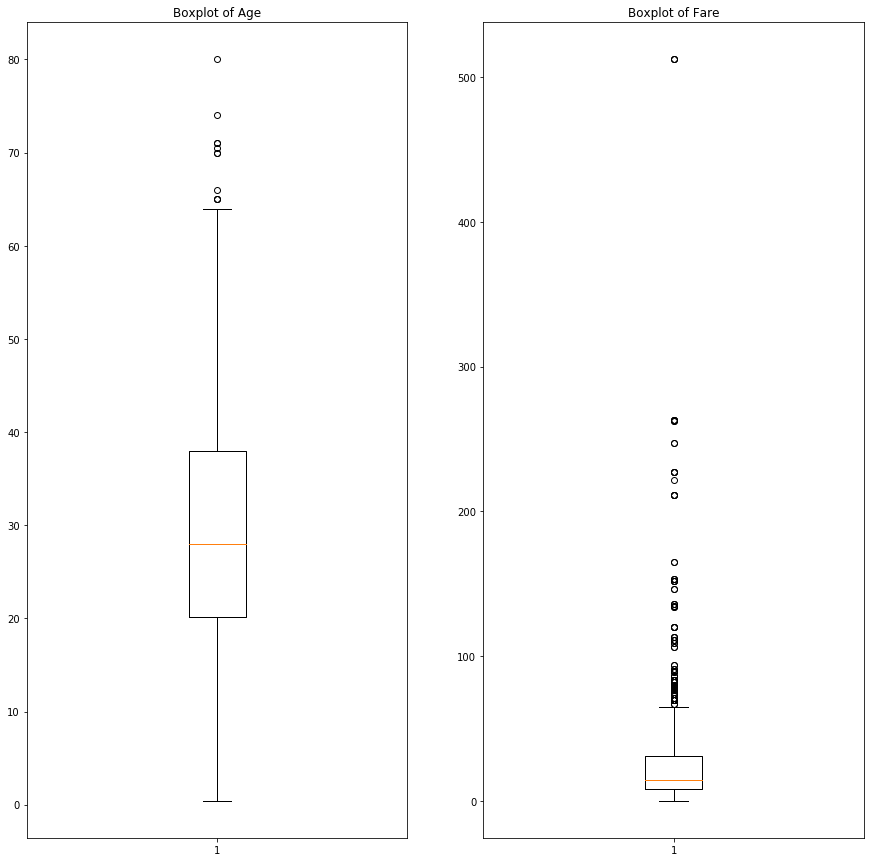

In [9]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].boxplot(titanic_raw_df['Age'].dropna().values)
ax[0].set_title("Boxplot of Age")

ax[1].boxplot(titanic_raw_df['Fare'].dropna().values)
ax[1].set_title("Boxplot of Fare")
plt.show()

I see a fair number of outliers, which is to be expected for a luxury cruise ship, but nothing else too usual from the boxplot.

In [11]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp','Parch']:
    print("----- Counts of {0} -----".format(col))
    print(titanic_raw_df[col].value_counts(dropna=False))
    print()

----- Counts of Survived -----
0    549
1    342
Name: Survived, dtype: int64

----- Counts of Pclass -----
3    491
1    216
2    184
Name: Pclass, dtype: int64

----- Counts of Sex -----
male      577
female    314
Name: Sex, dtype: int64

----- Counts of Embarked -----
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

----- Counts of SibSp -----
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

----- Counts of Parch -----
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



I take counts of the differen possible values for each column, and all values seems reasonable. Only the 'embarked' columns has unsual values, 'Nan'.

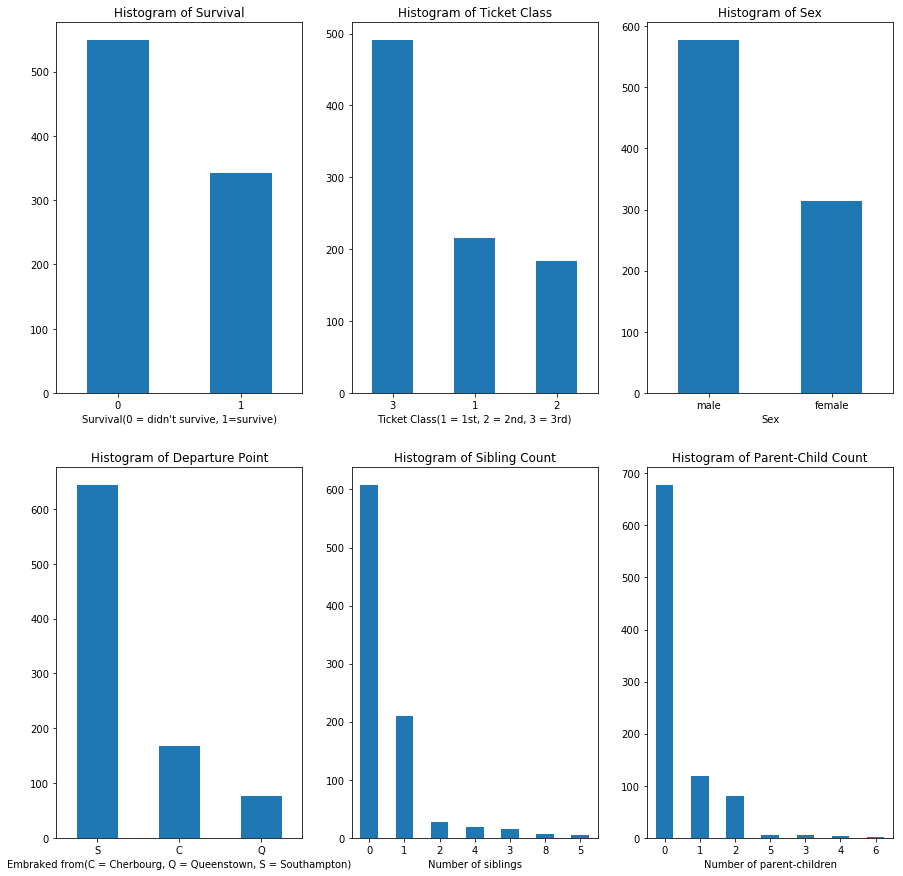

In [12]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)


labels = ["Survival(0 = didn't survive, 1=survive)",
       "Ticket Class(1 = 1st, 2 = 2nd, 3 = 3rd)",
       "Sex",
       "Embraked from(C = Cherbourg, Q = Queenstown, S = Southampton)",
       "Number of siblings",
       "Number of parent-children"]

titles = ['Survival', 'Ticket Class', 'Sex',
        'Departure Point', 'Sibling Count', 'Parent-Child Count']
cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 
                           'SibSp','Parch']

for idx, label, title, col in zip(range(len(labels)), labels, titles, cols):
    row, cols = (idx // 3), (idx % 3)
    ax_ = titanic_raw_df[col].value_counts().plot(kind='bar', ax=ax[row, cols],
                                         rot=0,
                                        title='Histogram of {0}'.format(title))
    ax_.set_xlabel(label)
plt.show()

## Who was more likely to survive?

I have several possible factors in mind that might have given some people an edge in surviving the titanic.

First: There's an old code of conduct of 'women and children first'. I want to see if we had data to support this claim.

Second: Maybe people with high class tickets were in cabins closer to deck and thus more likely to reach the life boats.

Third: People who paid more where more likely to survive.

### Where women and child more likely to survive?

For this investigation, I define women as a person whose sex is female, and an child as person under the age of 18.

I add a column called 'is_under_18_or_female', which is a bolean column.

In [14]:
is_under_18_or_female = (titanic_raw_df['Age'] < 18) | \
                        (titanic_raw_df['Sex'] == 'female')
modified_raw_df = titanic_raw_df
modified_raw_df['is_under_18_or_female'] = is_under_18_or_female
modified_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_under_18_or_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [132]:
non_child_women, child_women = modified_raw_df['is_under_18_or_female'] \
                                .value_counts().values
    
"The number of women and child is {0} \
and the number of adult males is {1}".format(child_women, non_child_women)

'The number of women and child is 372 and the number of adult males is 519'

So, there seems to be more adult males on the titanic than women and child. Let's group the data by 'is_under_18_or_female'. Let's see the survival numbers

In [16]:
modified_raw_df.groupby(['is_under_18_or_female', 'Survived'])\
                            ['Survived'].count()

is_under_18_or_female  Survived
False                  0           433
                       1            86
True                   0           116
                       1           256
Name: Survived, dtype: int64

In [17]:
temp = modified_raw_df.groupby(['is_under_18_or_female', 'Survived'])\
                            ['Survived'].count()
non_child_women_non_survival, non_child_women_survival, \
child_women_non_survival, child_women_survival = temp.values

print('The number of males who didn\'t survive is {0} and who did survive is {1}. \
And, the total is {2}'.format(non_child_women_non_survival,
                              non_child_women_survival,
                              non_child_women))
print()
print('The number of women and child who didn\'t survive is {0} and who did survive \
is {1}. And, the total is {2}'.format(child_women_non_survival,
                              child_women_survival,
                              child_women))

The number of males who didn't survive is 433 and who did survive is 86. And, the total is 519

The number of women and child who didn't survive is 116 and who did survive is 256. And, the total is 372


In [133]:
frequency_data = {'survived frequency': [child_women_survival/child_women,
                         non_child_women_survival/non_child_women],
 'non survived frequency': [child_women_non_survival/child_women,
                         non_child_women_non_survival/non_child_women]
}
pd.DataFrame(frequency_data, index=['women and child', 'adult man'])

,non survived frequency,survived frequency
women and child,0.311828,0.688172
adult man,0.834297,0.165703


#### Conclusion

__68.82%__ of women and child survived the titantic while __only 16.57%__ of adult man survived. Even given there were 147 more man on the titanic than women and child, the difference seems a little high. 

I conclude that there is evidence to support the claim that the code of conduct 'women and child first' was followed on the titanic.

### Where people with higher fares more likely to survive?

The price ones pays for a ticket on the titanic is probably correlated with what class that person was in. For example, a first class passenger assuredly paid for his or her ticket at a high price. So, I would except the survival to have higher mean fare price when compared to passenger who did not.

In [20]:
modified_raw_df[['Fare', 'Survived']].groupby('Survived').describe()

Fare                                                          
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

In [21]:
print(12.4750 - 1.5*(57-12.4750))
print(57.0 + 1.5*(57-12.4750))
print(26.0 + 1.5*(26-7.8542))

-54.31249999999999
123.7875
53.2187


In [22]:
temp = modified_raw_df[(modified_raw_df['Fare'] < 123.7875) & 
                      (modified_raw_df['Survived'] == 1)]
temp['Fare'].describe()

count    314.000000
mean      32.990500
std       28.742998
min        0.000000
25%       11.160400
50%       23.250000
75%       51.965625
max      120.000000
Name: Fare, dtype: float64

In [23]:
temp = modified_raw_df[(modified_raw_df['Fare'] < 53.2187) & 
                      (modified_raw_df['Survived'] == 0)]
temp['Fare'].describe()

count    506.000000
mean      15.028103
std       11.136333
min        0.000000
25%        7.795800
50%        9.225000
75%       21.000000
max       53.100000
Name: Fare, dtype: float64

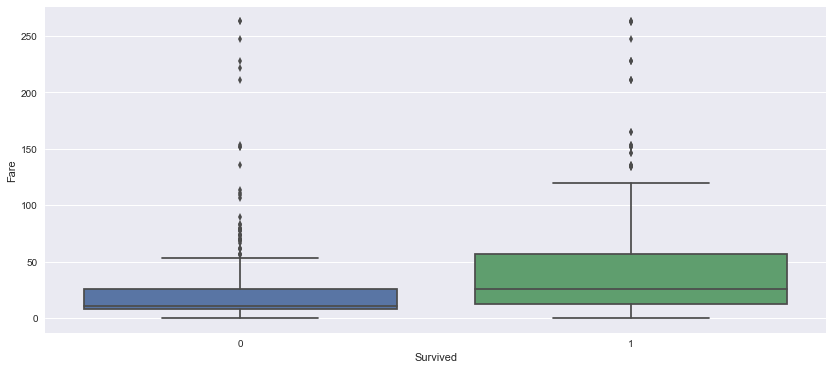

In [131]:
seaborn.set(rc={"figure.figsize": (14, 6)})
seaborn.boxplot(y='Fare', x='Survived',data=modified_raw_df[modified_raw_df['Fare'] < 512])
plt.show()

In [24]:
#(modified_raw_df['Fare'] == 0).sum()
#modified_raw_df[modified_raw_df['Fare'] == 0]

### Where people in higher class more likely to survive?

In [74]:
modified_raw_df.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [71]:
first_class_non_survived, \
first_class_survived, \
second_class_non_survived, \
second_class_survived, \
third_class_non_survived, \
third_class_survived \
= modified_raw_df.groupby(['Pclass', 'Survived'])['Pclass'].count().values

first_class_total, \
second_class_total, \
third_class_total \
= modified_raw_df.groupby(['Pclass'])['Pclass'].count().values

In [72]:
print("There were {0} first class passengers, {1}% survived while {2}% did not survive".format(
                                                      first_class_total,
                                                      round(100 * first_class_survived / first_class_total, 2),
                                                      round(100 * first_class_non_survived / first_class_total, 2)))

print("There were {0} second class passengers, {1}% survived while {2}% did not survive".format(
                                                      second_class_total,
                                                      round(100 * second_class_survived / second_class_total, 2),
                                                      round(100 * second_class_non_survived / second_class_total, 2)))

print("There were {0} third class passengers, {1}% survived while {2}% did not survive".format(
                                                      third_class_total,
                                                      round(100 * third_class_survived / third_class_total, 2),
                                                      round(100 * third_class_non_survived / third_class_total, 2)))

There were 216 first class passengers, 62.96% survived while 37.04% did not survive
There were 184 second class passengers, 47.28% survived while 52.72% did not survive
There were 491 third class passengers, 24.24% survived while 75.76% did not survive


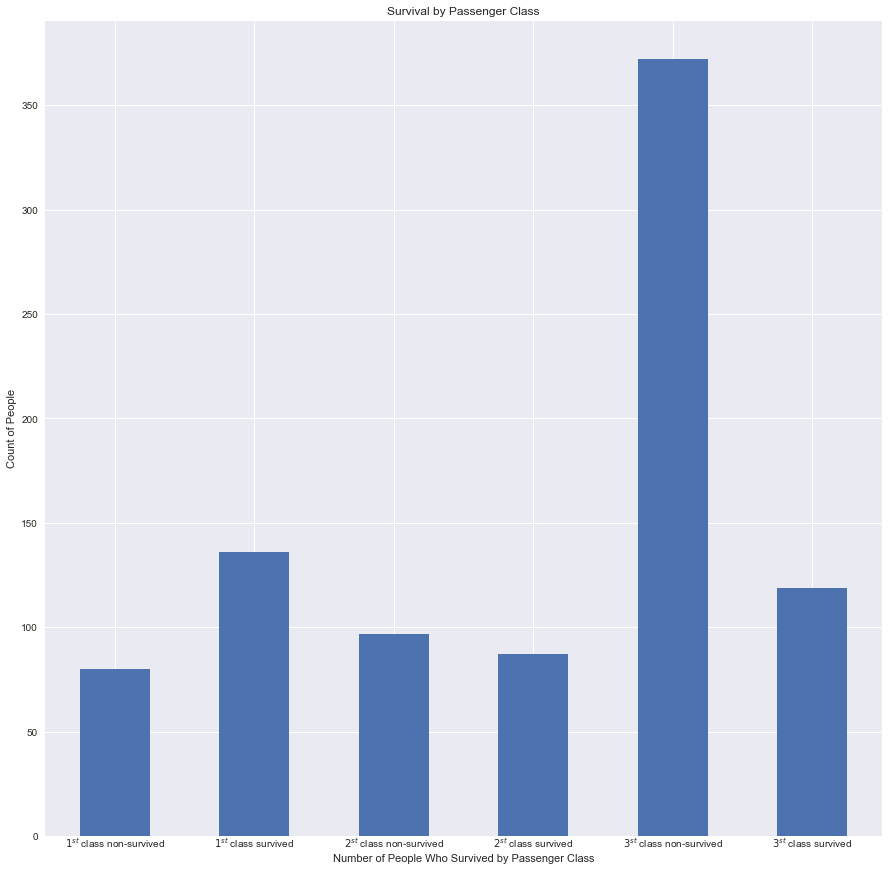

In [115]:
ax = modified_raw_df.groupby(['Pclass', 'Survived'])['Pclass'].count().plot(kind='bar',rot = 0, figsize=(15,15),
                                                                           title='Survival by Passenger Class')
ax.tick_params(axis='x', pad=0)
ax.set_xlabel("Number of People Who Survived by Passenger Class")
ax.set_ylabel("Count of People")
ax.set_xticklabels([r'$1^{st}$ class non-survived',
                    r'$1^{st}$ class survived',
                    r'$2^{st}$ class non-survived',
                    r'$2^{st}$ class survived',
                    r'$3^{st}$ class non-survived',
                    r'$3^{st}$ class survived'])

plt.show()

From the graph, I can see that $1^{st}$ class had more survivor than either $2^{nd}$ class or $3^{rd}$. And, a much greater number of $3^{rd}$ class passeger died than survived. From this, I wouldn't say that being in $1^{st}$ or $2^{rd}$ greatly increased your odds of surviving, but being a $3^{rd}$ does seem to be negatively affect survival.

In [116]:
modified_raw_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'is_under_18_or_female'],
      dtype='object')

## Conclusion

I look at several factors that could have help with suriviving the stinking of the titantic. From the data, I think women and child were likely to survive than men, possible due to code of conduct of 'women and child first'. People with higher fares were more likely to survive  